# **Capstone Project -Ideal neighborhoods for PARKS in York ,Canada** (week 2)
---







# **Introduction /Business Problem**

***Objective*** :

To find the neighborhoods that do not have parks in York, Canada . We also aim to find the neighborhoods that already have parks in their neighborhood ,which can be enjoyed by the residents. 

### ***Purpose*** : 
This analysis will be useful to those who are planning to construct a park based on whether the neighborhoods in York ,Canada already contain an existing park or not. It will also be beneficial to those choosing a residential or office space depending on which neighborhoods have a Park or not. This will help the people who seek or are trying to avoid parks in the vicinity of their neighborhood ,be it for professional reasons or for private reasons.

Constructing parks in areas where parks don't already exist would make more sense as it will bring in more residents or people which could include the youth , families ,pet owners , fitness enthusiasts or just regular folks who are trying to get away from the digital world for a bit.

It also allows people in York looking to avoid parks in their vicinity which maybe due to health reasons such as allergies or the increased rent due to the availability of such amenities or maybe just a personal preference altogether.

# **York, Canada**

York is a former city within the current city of Toronto, Ontario, Canada. It is located northwest of Old Toronto, southwest of North York and east of Etobicoke, where it is bounded by the Humber River. As a separate city, it was one of six municipalities that amalgamated in 1998 to form the current city of Toronto.

In 1998 it amalgamated with the cities of Toronto, Etobicoke, Scarborough, and North York and the borough of East York to form the City of Toronto. York was established as a borough in 1967, through the amalgamation of the township of York and the town of Weston (incorporated 1881). It was incorporated as a city in 1983. The original York Township was formed in 1793, and it was once called Dublin.

# **Data collection**

## ***Postal Codes of Canada*** :
The data which consists of the Postal codes of Canada starting with the letter "m" is taken from the Wikipedia page : "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"
The data is scraped from a Wikipedia page and then loaded into a Pandas dataframe. This is done using the read_html method.

The data is then cleaned by dropping rows where borough values are "Not Assigned " as they have no value to our cause.

## ***Geospatial data***
The Geospatial data is available in the form of a CSV file in "https://cocl.us/Geospatial_data" .We extract the data from CSV file to panda dataframe. It contains the Latitude and longitude data against the postal codes which are required to identify the location on the maps.


## ***Foursquare API*** : 
The Foursquare Places API provides location based experiences with diverse information about venues, users, photos, and check-ins. The API supports real time access to places, Snap-to-Place that assigns users to specific locations, and Geo-tag. Additionally, Foursquare allows developers to build audience segments for analysis and measurement. JSON is the preferred response format.

The Foursquare API allows application developers to interact with the Foursquare platform. The API itself is a RESTful set of addresses to which you can send requests, so there's really nothing to download onto your server. There are both GET and POST methods you can use, which means you aren't just limited to reading from feeds, you can also do useful stuff like checking in and creating locations using the API. As for rate limits, your application is limited to 200 requests per hour per method, so you probably want to implement some kind of result caching to "play nice."





# **Machine Learning Algorithm Used**

## ***One Hot Encoding***
For categorical variables where no such ordinal relationship exists, the integer encoding is not enough.

In fact, using this encoding and allowing the model to assume a natural ordering between categories may result in poor performance or unexpected results (predictions halfway between categories).

In this case, a one-hot encoding can be applied to the integer representation. This is where the integer encoded variable is removed and a new binary variable is added for each unique integer value

Here we use one-hot encoding of the data using the get_dummies() method. Then we group the new one-hot encoded dataset by neighborhood. This is done to find out the common venues in each neighborhood by their means. This helps to find out which neighborhoods have pre-built parks (mean > 0) and which neighborhoods do not. 

## ***K- Means Clustering***
K-means clustering is one of the simplest and popular unsupervised machine learning algorithms.
The objective of K-means is simple: group similar data points together and discover underlying patterns. To achieve this objective, K-means looks for a fixed number (k) of clusters in a dataset.”
A cluster refers to a collection of data points aggregated together because of certain similarities.
You’ll define a target number k, which refers to the number of centroids you need in the dataset. A centroid is the imaginary or real location representing the center of the cluster.
Every data point is allocated to each of the clusters through reducing the in-cluster sum of squares.
In other words, the K-means algorithm identifies k number of centroids, and then allocates every data point to the nearest cluster, while keeping the centroids as small as possible.
The ‘means’ in the K-means refers to averaging of the data; that is, finding the centroid.

Here ,we use k -means to cluster the neighnorhoods with and without parks.


### **Libraries Used** :

**Pandas , numpy**: for data manipulation and efficient handling

**Matplotlib, Seaborn**: Data visualization and plotting libraries

**Folium**:Python library used for visualizing geospatial data.

**Geocoder**: Python library to convert an address into latitude and longitude values

**JSON**: Library to handle and parse JSON files

**requests**: Library to handle requests


## **Importing the necessary libraries**

In [33]:
import numpy as np
import pandas as pd

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes 
import folium # map rendering library

print('Libraries imported.')

/bin/bash: conda: command not found
Libraries imported.


## **Introduce Data Source**

In [34]:
url = "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"

## **Reading data source into Pandas Dataframes**

In [35]:
df1, df2, df3 = pd.read_html(url)
print("Data successfully read into Pandas dataframe. Here are the first five rows:")
df1.head()

Data successfully read into Pandas dataframe. Here are the first five rows:


,Postal Code,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"


## **Cleansing the Data**

The above data consists of some rows that need to be removed .The Rows where the boroughs are "Not assigned" should be dropped to clean the data.

In [36]:
for row, item in enumerate(df1.Borough.tolist()):
    if item == "Not assigned":
        df1.drop(row, axis=0, inplace=True)
        
df1.set_index("Postal Code", inplace=True)
df1.reset_index(inplace=True)
df1.head()     #  first five rows of the cleaned dataset

,Postal Code,Borough,Neighbourhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"


## **Read Co-ordinates (latitude and longitude) from CSV file**

Read the latitude and longitude data from the CSV file and add it to the existing dataset with Postal code , Borough and Neighborhoods.

In [37]:
latlon_df = pd.read_csv("https://cocl.us/Geospatial_data")
latlon_df.set_index("Postal Code", inplace=True)
latlon_df.head()

,Latitude,Longitude
Postal Code,,
M1B,43.806686,-79.194353
M1C,43.784535,-79.160497
M1E,43.763573,-79.188711
M1G,43.770992,-79.216917
M1H,43.773136,-79.239476


Merging both the data sets based on postal code

In [38]:
new_df = pd.merge(df1, latlon_df, how='inner', on="Postal Code")
new_df.head()

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494


In [39]:
new_df.rename(columns={'Neighbourhood':'Neighborhood'}, inplace=True) #renaming
new_df.head(100)

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
...,...,...,...,...,...
95,M1X,Scarborough,Upper Rouge,43.836125,-79.205636
96,M4X,Downtown Toronto,"St. James Town, Cabbagetown",43.667967,-79.367675
97,M5X,Downtown Toronto,"First Canadian Place, Underground city",43.648429,-79.382280
98,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North",43.653654,-79.506944


## **Clustering Neighborhoods in York**

Since data has now been gathered and cleaned , it is time to cluster the neighborhoods in York

In [40]:
york_df = new_df[new_df["Borough"]=="York"].reset_index(drop=True)
york_df.head()


,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M6C,York,Humewood-Cedarvale,43.693781,-79.428191
1,M6E,York,Caledonia-Fairbanks,43.689026,-79.453512
2,M6M,York,"Del Ray, Mount Dennis, Keelsdale and Silverthorn",43.691116,-79.476013
3,M6N,York,"Runnymede, The Junction North",43.673185,-79.487262
4,M9N,York,Weston,43.706876,-79.518188


In [41]:
print("There are {} neighborhoods in York, Canada".format(york_df.shape[0]))

There are 5 neighborhoods in York, Canada


Visualizing the coordinates of York on a Map

In [42]:
address = 'York, Ontario'
geolocator = Nominatim(user_agent="york_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print("Geographical coordinates of York are {}, {}".format(latitude, longitude))

Geographical coordinates of York are 43.2416104, -77.31387453711392


In [43]:

map_york = folium.Map(location=[latitude, longitude], zoom_start=11)
for lat, lng, borough, neighborhood in zip(york_df['Latitude'], york_df['Longitude'], york_df['Borough'], york_df['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker([lat, lng], radius=5, popup=label, color='blue', fill=True, fill_color="#3186cc", parse_html=False).add_to(map_york)
map_york

## **Introducing the Foursquare API to gather venue details**

### **Defining the Foursquare Credentials**

In [44]:
CLIENT_ID = 'QYV0XDLCCB1F4WX0HGHO5HPSWRKTKHD2JRTV125HWYK1EMUZ' # your Foursquare ID
CLIENT_SECRET = 'EDPZ3ADRJ4DJPBGWFVKWOMXWG5WFUSG22ZUV3GXS3JSVJJSJ' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: QYV0XDLCCB1F4WX0HGHO5HPSWRKTKHD2JRTV125HWYK1EMUZ
CLIENT_SECRET:EDPZ3ADRJ4DJPBGWFVKWOMXWG5WFUSG22ZUV3GXS3JSVJJSJ


In [45]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'\
        .format(CLIENT_ID, CLIENT_SECRET, VERSION, lat, lng, radius, LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        #return only relevant information for each venue
        venues_list.append([(name, lat, lng, 
                             v['venue']['name'], v['venue']['location']['lat'], v['venue']['location']['lng'],
                             v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue in venues_list for item in venue])
    nearby_venues.columns = ['Neighborhood','Neighborhood Latitude', 'Neighborhood Longitude', 
                             'Venue', 'Venue Latitude', 'Venue Longitude', 'Venue Category']
    
    return nearby_venues


In [46]:
york_venues=getNearbyVenues(york_df['Neighborhood'], york_df['Latitude'], york_df['Longitude'])
york_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Humewood-Cedarvale,43.693781,-79.428191,Cedarvale Park,43.692535,-79.428705,Field
1,Humewood-Cedarvale,43.693781,-79.428191,Cedarvale Ravine,43.690188,-79.426106,Trail
2,Humewood-Cedarvale,43.693781,-79.428191,Glen Cedar Park,43.695399,-79.429253,Playground
3,Humewood-Cedarvale,43.693781,-79.428191,Phil White Arena,43.691303,-79.431761,Hockey Arena
4,Caledonia-Fairbanks,43.689026,-79.453512,Nairn Park,43.690654,-79.456300,Park


In [47]:

num_unique_cat = len(york_venues['Venue Category'].unique())
print('There are {} unique categories!'.format(num_unique_cat))

There are 14 unique categories!


Listiing the unique categories

In [48]:
print(york_venues["Venue Category"].unique())

['Field' 'Trail' 'Playground' 'Hockey Arena' 'Park' "Women's Store" 'Bar'
 'Sandwich Place' 'Convenience Store' 'Discount Store'
 'Turkish Restaurant' 'Bus Line' 'Brewery' 'Breakfast Spot']


## **Analyze Each Neighborhood**

one-hot encode the new dataframe and explore each neighborhood.



In [49]:
# one hot encoding
york_onehot = pd.get_dummies(york_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back into the dataframe
york_onehot['Neighborhood'] =york_venues['Neighborhood']

# move the neighborhood column to the first column
fixed_columns = [york_onehot.columns[-1]] + list(york_onehot.columns[:-1])
york_onehot = york_onehot[fixed_columns]
york_onehot.head(100)

,Neighborhood,Bar,Breakfast Spot,Brewery,Bus Line,Convenience Store,Discount Store,Field,Hockey Arena,Park,Playground,Sandwich Place,Trail,Turkish Restaurant,Women's Store
0,Humewood-Cedarvale,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,Humewood-Cedarvale,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,Humewood-Cedarvale,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,Humewood-Cedarvale,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,Caledonia-Fairbanks,0,0,0,0,0,0,0,0,1,0,0,0,0,0
5,Caledonia-Fairbanks,0,0,0,0,0,0,0,0,0,0,0,0,0,1
6,Caledonia-Fairbanks,1,0,0,0,0,0,0,0,0,0,0,0,0,0
7,Caledonia-Fairbanks,0,0,0,0,0,0,0,0,1,0,0,0,0,0
8,"Del Ray, Mount Dennis, Keelsdale and Silverthorn",0,0,0,0,0,0,0,0,0,0,1,0,0,0
9,"Del Ray, Mount Dennis, Keelsdale and Silverthorn",0,0,0,0,1,0,0,0,0,0,0,0,0,0


Group rows by neighborhood and by taking the mean of the frequency of occurence of each category.

In [50]:
york_grouped = york_onehot.groupby('Neighborhood').mean().reset_index()
york_grouped.head()

,Neighborhood,Bar,Breakfast Spot,Brewery,Bus Line,Convenience Store,Discount Store,Field,Hockey Arena,Park,Playground,Sandwich Place,Trail,Turkish Restaurant,Women's Store
0,Caledonia-Fairbanks,0.25,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.5,0.00,0.0,0.00,0.0,0.25
1,"Del Ray, Mount Dennis, Keelsdale and Silverthorn",0.20,0.00,0.00,0.00,0.20,0.2,0.00,0.00,0.0,0.00,0.2,0.00,0.2,0.00
2,Humewood-Cedarvale,0.00,0.00,0.00,0.00,0.00,0.0,0.25,0.25,0.0,0.25,0.0,0.25,0.0,0.00
3,"Runnymede, The Junction North",0.00,0.25,0.25,0.25,0.25,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.00
4,Weston,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,1.0,0.00,0.0,0.00,0.0,0.00


Searching for all the neighborhoods that do not have a Park. 
For this ,we extract the neighborhoods for which the mean value of park = 0.

In [51]:
no_park = york_grouped[york_grouped["Park"]==0]
no_park=no_park[["Neighborhood", "Park"]]
no_park.head()

,Neighborhood,Park
1,"Del Ray, Mount Dennis, Keelsdale and Silverthorn",0.0
2,Humewood-Cedarvale,0.0
3,"Runnymede, The Junction North",0.0


Similarly, let's find the neighbourhoods that have Parks already .

In [52]:
park = york_grouped[york_grouped["Park"]>=0.01]
park[["Neighborhood", "Park"]]

,Neighborhood,Park
0,Caledonia-Fairbanks,0.5
4,Weston,1.0


Let's visualize the distribution of Parks in the 2 Neighborhoods where Parks are present --- Caledonia-Fairbanks and Weston

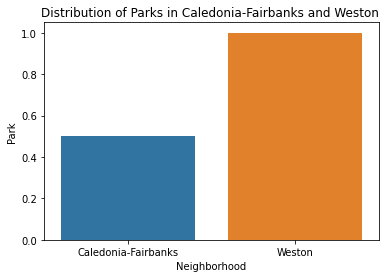

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.barplot(x="Neighborhood", y="Park", data=park) # bar graph
plt.title("Distribution of Parks in Caledonia-Fairbanks and Weston ")
plt.show()

The above graph visualizes the distribution of Parks in these neighborhoods . We observe from the graph that **Weston** has more Parks than Caledonia-Fairbanks  
If one were to choose a neighborhood with more access to parks for walks ,jogs ,fresh air or even to take your pet out for a stroll , then these places would be ideal.

## **Plotting the Neighborhood with no parks**

In [54]:
plot_df = pd.merge(no_park, new_df, how='inner', on="Neighborhood")
plot_df = plot_df[["Neighborhood", "Latitude", "Longitude"]]
plot_df.head()

,Neighborhood,Latitude,Longitude
0,"Del Ray, Mount Dennis, Keelsdale and Silverthorn",43.691116,-79.476013
1,Humewood-Cedarvale,43.693781,-79.428191
2,"Runnymede, The Junction North",43.673185,-79.487262


In [55]:
#Visualizing 
map_nopark = folium.Map(location=[latitude, longitude], zoom_start=10)
for lat, lng, neighborhood in zip(plot_df['Latitude'], plot_df['Longitude'], plot_df['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker([lat, lng], radius=5, popup=label, color='blue', fill=True, fill_color="#3186cc", parse_html=False).add_to(map_nopark)
map_nopark

### **Clustering the Neighborhoods using K-Means Cluster**

In [56]:
k = 2
X = york_grouped.drop('Neighborhood', axis = 1)
# run k-means clustering
kmeans = KMeans(n_clusters = k, random_state=0, init="k-means++")
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [57]:
new_cluster_df = pd.merge(york_grouped, york_df, how='inner', on='Neighborhood')
new_cluster_df=new_cluster_df[["Neighborhood", "Latitude", "Longitude"]]
new_cluster_df.drop_duplicates(subset=["Neighborhood"], inplace=True)
new_cluster_df.set_index("Neighborhood", inplace=True)
new_cluster_df.reset_index(inplace=True)
new_cluster_df.head()

,Neighborhood,Latitude,Longitude
0,Caledonia-Fairbanks,43.689026,-79.453512
1,"Del Ray, Mount Dennis, Keelsdale and Silverthorn",43.691116,-79.476013
2,Humewood-Cedarvale,43.693781,-79.428191
3,"Runnymede, The Junction North",43.673185,-79.487262
4,Weston,43.706876,-79.518188


In [58]:
new_cluster_df['Cluster_Labels'] = kmeans.labels_
new_cluster_df.head()

,Neighborhood,Latitude,Longitude,Cluster_Labels
0,Caledonia-Fairbanks,43.689026,-79.453512,0
1,"Del Ray, Mount Dennis, Keelsdale and Silverthorn",43.691116,-79.476013,1
2,Humewood-Cedarvale,43.693781,-79.428191,1
3,"Runnymede, The Junction North",43.673185,-79.487262,1
4,Weston,43.706876,-79.518188,0


In [59]:
map_clustered = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(k)
ys = [i + x + (i*x)**2 for i in range(k)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(new_cluster_df['Latitude'], new_cluster_df['Longitude'],
                                  new_cluster_df['Neighborhood'], new_cluster_df['Cluster_Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clustered)
       
map_clustered

Cluster 0 - Contains - Caledonia-Fairbanks and Weston - These are the neighborhoods that have parks

Cluster 1 - Contains - Del Ray, Mount Dennis, Keelsdale and Silverthorn,Humewood-Cedarvale , Runnymede, The Junction North - These are the neighborhoods that do NOT have parks

## **Results**

Here we see that only 2 Neighborhoods have parks and they are as mentioned below . Let's call them **Cluster 0**

In [60]:
park[["Neighborhood"]]

,Neighborhood
0,Caledonia-Fairbanks
4,Weston


Here we see that the following 3 neighborhoods don't have a park in them . Let's call them Cluster 1.

In [61]:
no_park[["Neighborhood"]]

,Neighborhood
1,"Del Ray, Mount Dennis, Keelsdale and Silverthorn"
2,Humewood-Cedarvale
3,"Runnymede, The Junction North"


## **Conclusion**

If a person is looking for a new residential space or office space in York 
based on the availability of a park in their neighborhood then they can go for the Neighborhoods - Cluster 0 - **Caledonia-Fairbanks** and	**Weston** . And if ,anyone is planning to a construst a new park then it would be better to avoid this cluster or at the very least consider this cluster at a later point if the aim is to have a park in every neighborhood.

If a person or group is looking for a neighborhood without parks in order to construct new ones then , Cluster 1 is the right group which contains **Del Ray, Mount Dennis, Keelsdale and Silverthorn,Humewood-Cedarvale , Runnymede, The Junction North**. These are also apt for people looking for places without nearby parks which maybe due to the rising rents ,allergies and health conditions or even personal choices.

Fin.